In [1]:
import yfinance as yf
import plotly
import quandl
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, timedelta
%matplotlib inline
from IPython.display import Image
from IPython.core.display import HTML 

In [2]:
# Downloading the historical stock price from Yahoo Finance
NCLH = yf.download("NCLH", start = '2013-01-18', end = '2021-07-01', interval = '1d')
CCL = yf.download("CCL", start = '1978-07-24', end = '2021-07-01', interval = '1d')
# NCLH.head()
# CCL.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Norwegian Cruise Line 

<img src='http://gcaptain.com/wp-content/uploads/2013/01/ncl_Aerial_Breakaway_01-hires.jpg' width="800" height="400">

## Company Valuation at IPO:

Company Valuation at IPO: Norwegian Cruise Line priced shares of its initial public offering at $\$19$ per share on Jan.17.2013, and when it opened next day, the stock soared to over $\$25$. This Miami-based cruise company were priced at $\$19$ a share, whihc was a strong reception from investors. The deal raised $\$447$ million for the company in IPO and sold 23.52 million shares.  

| Ticker| IPO Share Price| Amount of Shares| Raised Capital|  Growth  at IPO | Enterprise Value|
|:-----:|:----------------:|:----------------:|:---------------:|:----------:|:---------------:|
| NCLH  | $\$19$ per share |   23.52 Million  | $\$447$ Million |30.47%      | $\$6.4$ Million

## Current Valuation on July 1, 2021:

| Current Share Price | Shares Outstanding|   Revenue      |Gross Profit        |Enterprise Value| Market Cap|
|:------------------:|:----------------:|:----------------:|:------------------:|:--------------:|:---------:|
|$\$29.51$ per share | 369.93 Million  | $\$36.13$ Million | $\$-413.15$ Million|$\$19.41$ Billion|$\$10.69$ Billion|

## Stock performance analysis:

### Plotting the historical stock price

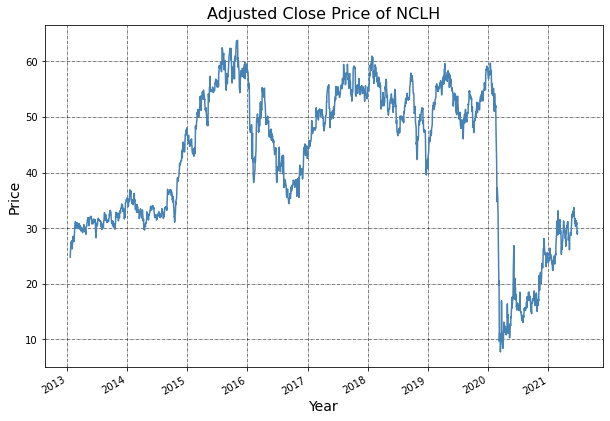

In [5]:
# Plot the adjusted close price of NCLH
NCLH['Adj Close'].plot(figsize=(10, 7), color = 'steelblue')
# Define the label for the title of the figure
ticker = 'NCLH'
plt.title("Adjusted Close Price of %s" % ticker, fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
# Show the plot
plt.show()

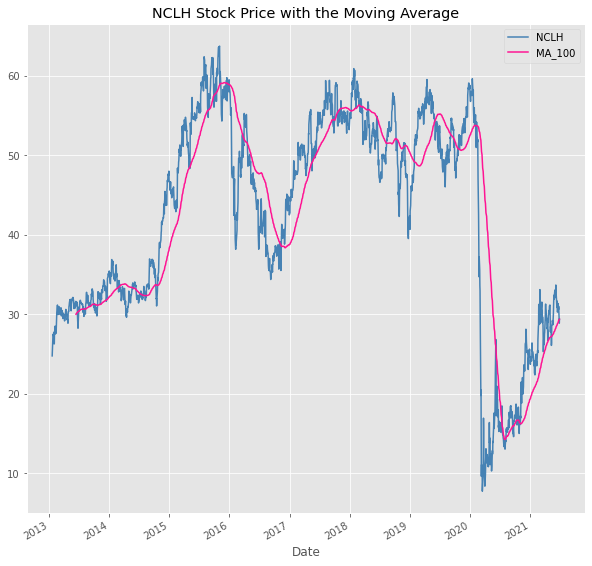

In [7]:
# Get the Moving Average (Rolling Mean) for NCLH (to determine the trend)
# Logically, we should buy the stocks are expericing downturn and sell when the stockes are expericing upturn. 
close_px_nclh = NCLH['Adj Close']
ma_nclh = close_px_nclh.rolling(window = 100).mean()

from matplotlib import style
import matplotlib as mpl
mpl.rc('figure', figsize=(10, 10))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px_nclh.plot(label='NCLH', color = 'steelblue', title = 'NCLH Stock Price with the Moving Average')
ma_nclh.plot(label='MA_100', color = 'deeppink')
plt.legend()

### Return rate

<AxesSubplot:title={'center':'Return rate for NCLH'}, xlabel='Date'>

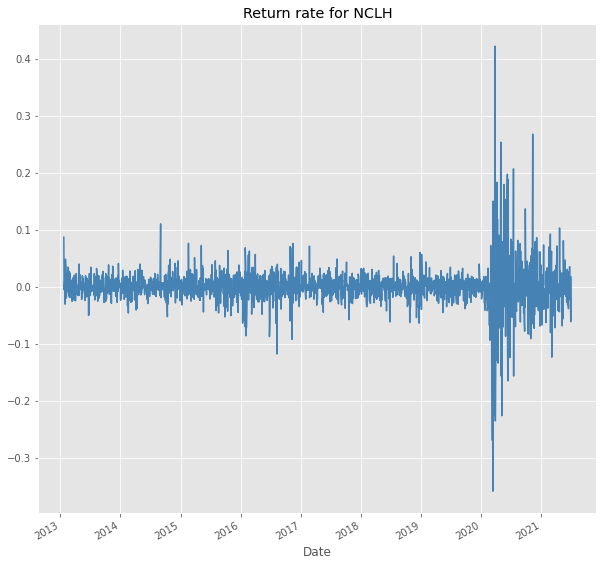

In [8]:
# Get the return deviation to determine risk and return
# Ideal stocks should return as high and stable as possible
# As a risk averse person, avoiding the 35% drop in the early 2020.
rets_nclh = close_px_nclh / close_px_nclh.shift(1) -1
rets_nclh.plot(label = 'Return', color = "steelblue", title = "Return rate for NCLH")


### Rolling Volatility

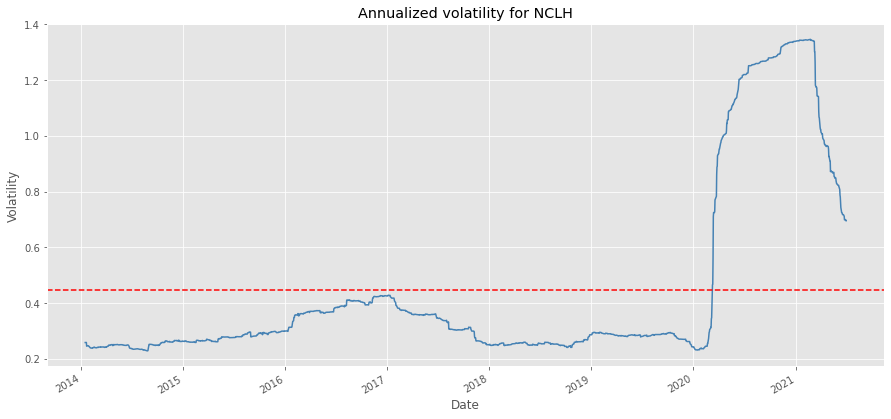

In [9]:
# Calculating the Annualized volatility for NCLH
# The trading days is set to 252 days
'''
Volitility measures the dispersion of returns over a certain time period.
It goes higher when the security gets riskier since the asset price changes dramatically during that period of time.
'''
Trading_days = 252
returns = np.log(NCLH['Close']/NCLH['Close'].shift(1))
returns.fillna(0, inplace=True)
volatility = returns.rolling(window=Trading_days).std()*np.sqrt(Trading_days)
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 1, 1)
volatility.plot(ax=ax1,color = "steelblue")
plt.axhline(y=volatility.mean(), color='r', linestyle='--')
ax1.set_xlabel('Date')
ax1.set_ylabel('Volatility')
ax1.set_title('Annualized volatility for NCLH')
plt.show()

### Sharpe ratio

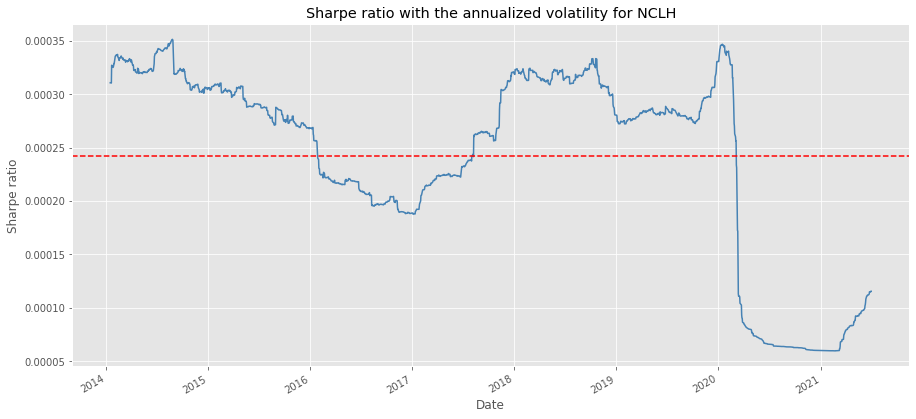

In [10]:
# Get the sharpe_ratio for NCLH
'''
Sharpe ratio measures the return of the security compared to its risk.
'''
sharpe_ratio = returns.mean()/volatility
sharpe_ratio.tail()
fig = plt.figure(figsize=(15, 7))
ax3 = fig.add_subplot(1, 1, 1)
sharpe_ratio.plot(ax=ax3, color = "steelblue")
plt.axhline(y=sharpe_ratio.mean(), color='r', linestyle='--')
ax3.set_xlabel('Date')
ax3.set_ylabel('Sharpe ratio')
ax3.set_title('Sharpe ratio with the annualized volatility for NCLH')
plt.show()

# Carnival Corporation & plc

<img src='https://upload.wikimedia.org/wikipedia/commons/3/34/Carnival_glory3.jpg' width="800" height="400">

## Company Valuation at IPO:

 On July 31, 1987, Carnival Crop completed its initial public offering of 20% of its common stock on the New York Exchange with a price of $\$3.875$ per share. It raised approximately $\$400$ million in capital. The capital raised was used to finance acquisitions.  

| Ticker | IPO Share Price| Amount of Shares| Raised Capital|Growth  at IPO |Enterprise Value|
|:------:|:----------------:|:----------------:|:---------------:|:----------:|:---------------:|
| CCL  | $\$3.875$ per share | 20% of its common stock | Approx $\$400$ Million | -1.61% | $\$2.11$ Billion

## Current Valuation on July 1, 2021:

| Current Share Price | Shares Outstanding|   Revenue      |Gross Profit        |Enterprise Value|    Market Cap   |
|:------------------:|:----------------:|:----------------:|:------------------:|:--------------:|:----------------:|
|$\$29.51$ per share | 973.83 Million  | $\$140$ Million | $\$834$ Million|$\$53.49$ Billion     | $\$30.52$ Billion|

## Stock Performance Analysis

### Ploting the historical stock price

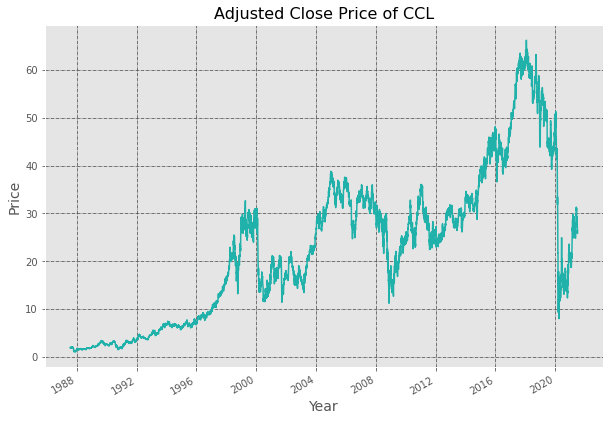

In [11]:
# Plot the adjusted close price of CCL
CCL['Adj Close'].plot(figsize=(10, 7), color = 'lightseagreen')
ticker = 'CCL'
plt.title("Adjusted Close Price of %s" % ticker, fontsize=16)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

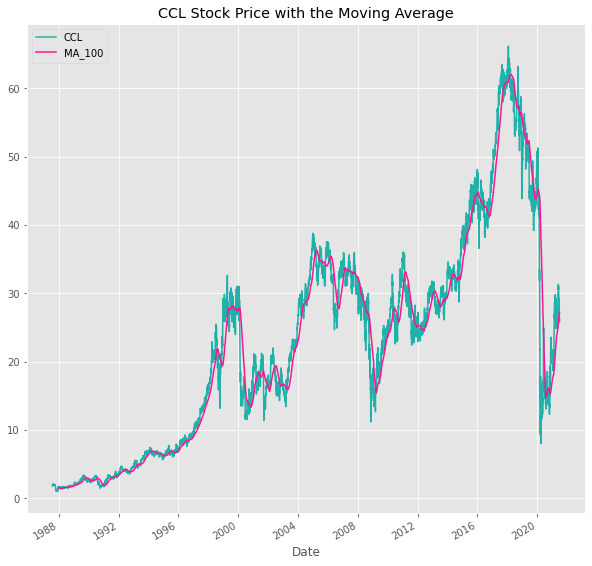

In [13]:
# Moving Average (Rolling Mean) for CCL (to determine the trend)
close_px_ccl = CCL['Adj Close']
ma_ccl = close_px_ccl.rolling(window = 100).mean()

mpl.rc('figure', figsize=(10, 10))
mpl.__version__
style.use('ggplot')
close_px_ccl.plot(label='CCL', color = 'lightseagreen', title = 'CCL Stock Price with the Moving Average')
ma_ccl.plot(label='MA_100', color = 'deeppink')
plt.legend()

### Return rate 

<AxesSubplot:title={'center':'Return rate for CCL'}, xlabel='Date'>

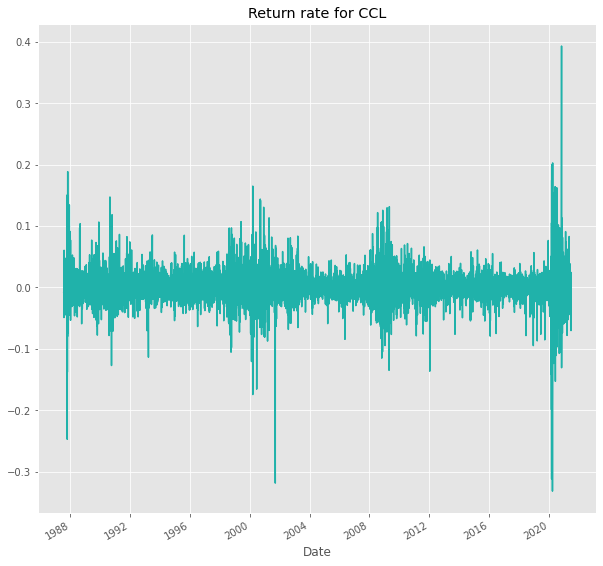

In [14]:
# Get the return deviation to determine risk and return
rets_ccl = close_px_ccl / close_px_ccl.shift(1) -1
rets_ccl.plot(label = 'Return', color = "lightseagreen", title = "Return rate for CCL")

### Rolling Volatility

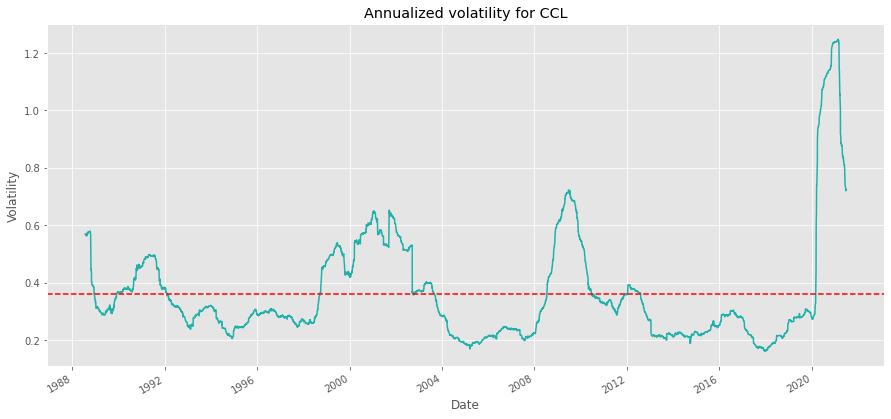

In [15]:
# Calculate the rolling volatility for CCL
returns = np.log(CCL['Close']/CCL['Close'].shift(1))
returns.fillna(0, inplace=True)
volatility = returns.rolling(window=Trading_days).std()*np.sqrt(Trading_days)
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 1, 1)
volatility.plot(ax=ax1, color = "lightseagreen")
plt.axhline(y=volatility.mean(), color='r', linestyle='--')
ax1.set_xlabel('Date')
ax1.set_ylabel('Volatility')
ax1.set_title('Annualized volatility for CCL')
plt.show()

### Sharpe ratio

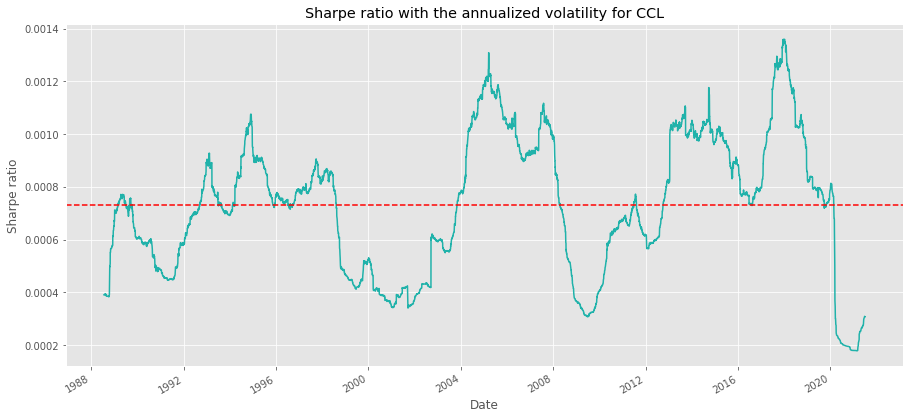

In [16]:
# Get the sharpe_ratio for CCL
sharpe_ratio = returns.mean()/volatility
sharpe_ratio.tail()
fig = plt.figure(figsize=(15, 7))
ax2 = fig.add_subplot(1, 1, 1)
sharpe_ratio.plot(ax=ax2, color = "lightseagreen")
plt.axhline(y=sharpe_ratio.mean(), color='r', linestyle='--')
ax2.set_xlabel('Date')
ax2.set_ylabel('Sharpe ratio')
ax2.set_title('Sharpe ratio with the annualized volatility for CCL')
plt.show()

# Comparison bw NCLH, CCL and NDAQ

In [17]:
# Extract the data from quandl and create a datafram
tickers_list = ['NCLH', 'CCL','NDAQ']
# Import pandas
comparison = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
 comparison[ticker] = quandl.get('WIKI/' + ticker)['Adj. Close']
# Print first 5 rows of the data
comparison.head()

,NCLH,CCL,NDAQ
Date,,,
2013-01-18,24.790,34.132606,25.040241
2013-01-22,26.950,33.999898,25.382676
2013-01-23,27.490,34.212231,25.271915
2013-01-24,27.345,34.415718,25.391906
2013-01-25,27.350,34.610357,25.567277


## Historical stock performance

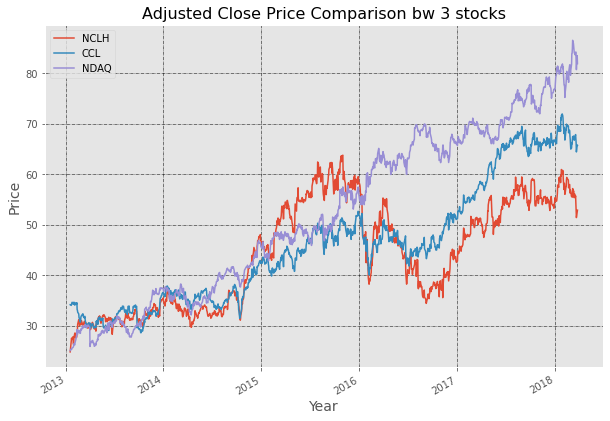

In [18]:
# Plot all the adj. close prices
comparison.plot(figsize=(10, 7))
plt.legend()

# Define the label for the title 
plt.title("Adjusted Close Price Comparison bw 3 stocks", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

## Risk and Return Comparison

In [19]:
corr = comparison.corr()

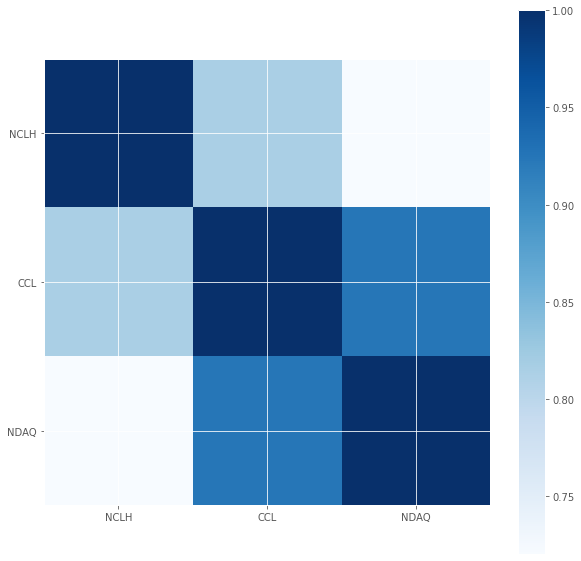

In [20]:
# Correlation Map bw NCLH, CCL and NDAQ
plt.imshow(corr, cmap='Blues', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

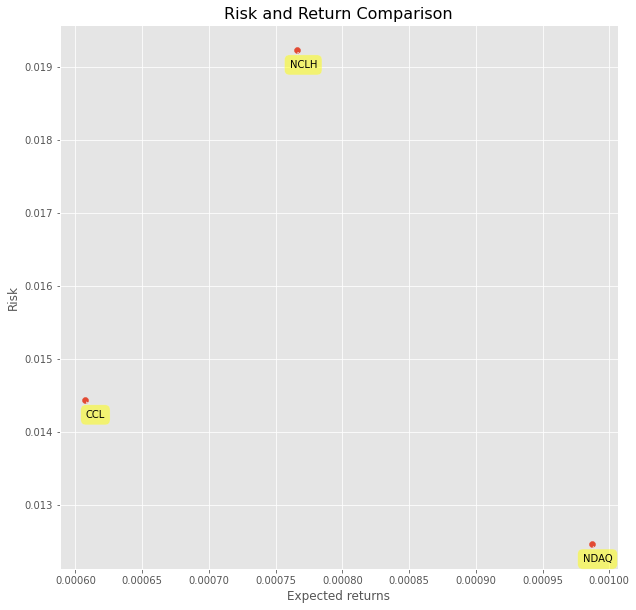

In [17]:
retscomp = comparison.pct_change()
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.title("Risk and Return Comparison", fontsize=16)
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

## Volatility Comparison

In [29]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override() 
date_from = datetime.date(2013, 1, 18)
date_to = datetime.date(2021, 6, 28)
pdr.get_data_yahoo('NCLH',date_from,date_to )

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-18,25.100000,25.490000,24.160000,24.790001,24.790001,17761800
2013-01-22,25.000000,27.360001,24.850000,26.950001,26.950001,2072000
2013-01-23,28.000000,28.860001,26.490000,27.490000,27.490000,1572200
2013-01-24,27.170000,27.900000,26.639999,27.350000,27.350000,508700
2013-01-25,27.500000,27.900000,26.280001,27.350000,27.350000,870700
...,...,...,...,...,...,...
2021-06-21,30.459999,31.430000,30.059999,31.379999,31.379999,12363300
2021-06-22,31.180000,31.240000,30.480000,30.840000,30.840000,10295900
2021-06-23,30.820000,31.379999,30.780001,31.000000,31.000000,8163100


In [32]:
tickers = ['NCLH', 'CCL', 'NDAQ']
def get(tickers, startdate, enddate):
    def data(ticker):
        return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
    datas = map(data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))
               
all_data = get(tickers, date_from,date_to )

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


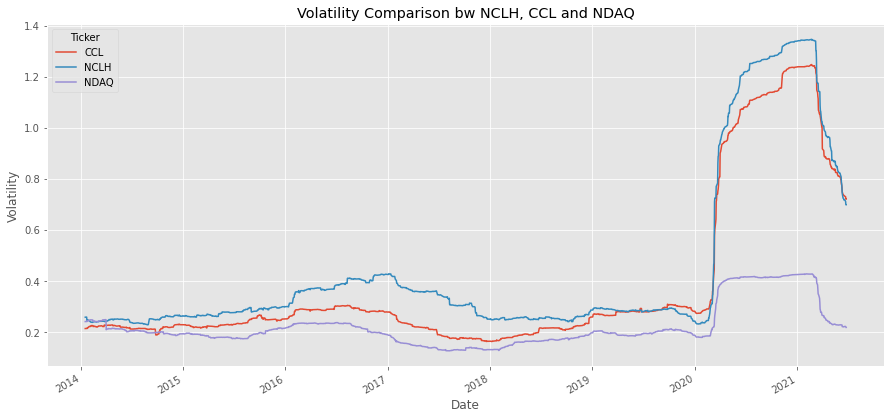

In [37]:
df = all_data.copy()
closePrice = df[['Close']]
closePrice = closePrice.reset_index()
closePriceTable = closePrice.pivot(index='Date', columns='Ticker', values='Close')
closePriceTable.tail()

# Computing volatility for three stocks
Trading_days = 252
returns_portfolio = np.log(closePriceTable/closePriceTable.shift(1))
returns_portfolio.fillna(0, inplace=True)
volatility_portfolio = returns_portfolio.rolling(window=Trading_days).std()*np.sqrt(Trading_days)
volatility_portfolio.tail()

fig = plt.figure(figsize=(15, 7))
ax3 = fig.add_subplot(1, 1, 1)
volatility_portfolio.plot(ax=ax3)
ax3.set_xlabel('Date')
ax3.set_ylabel('Volatility')
ax3.set_title('Volatility Comparison bw NCLH, CCL and NDAQ')
plt.show()

## Sharpe Ratio Comparison

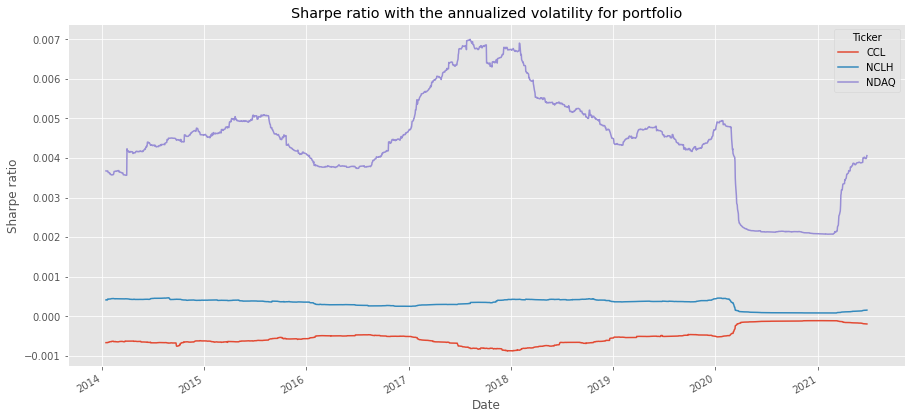

In [38]:
# Computing Sharpe Ratio for 3 stocks
'''
A high Sharpe ratio is good when compared to security similar with lower returns.
'''
sharpe_ratio_portfolio = returns_portfolio.mean()/volatility_portfolio
sharpe_ratio_portfolio.tail()
fig = plt.figure(figsize=(15, 7))
ax4 = fig.add_subplot(1, 1, 1)
sharpe_ratio_portfolio[sharpe_ratio_portfolio.columns[sharpe_ratio_portfolio.columns != 'JWN']].plot(ax=ax4)
ax4.set_xlabel('Date')
ax4.set_ylabel('Sharpe ratio')
ax4.set_title('Sharpe ratio with the annualized volatility for portfolio')
plt.show()